In [85]:
if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
from agents.networks.gru_rnn import GRU_RNN

In [60]:
HIDDEN_SIZE = 32
INPUT_SIZE = 1
DEVICE = 'cuda'
LEARNING_RATE = 1e-3
VAR_NOISE = 1e-4

In [61]:
network_untrained = GRU_RNN(
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    device=DEVICE,
    var_noise=VAR_NOISE,
)

load_path = '../../results/line_attr_supervised/test_2024-11-28_15_48_56_780557_var_noise_0.0001_activity_weight_1e-07/rnn_weights/000099.h5'
network_untrained.load_state_dict(torch.load(load_path, weights_only=True))

<All keys matched successfully>

In [62]:
w_hh_untrained = network_untrained.rnn.weight_hh.detach().cpu().numpy()
b_hh_untrained = network_untrained.rnn.bias_hh.detach().cpu().numpy()
w_ih_untrained = network_untrained.rnn.weight_ih.detach().cpu().numpy()
b_ih_untrained = network_untrained.rnn.bias_ih.detach().cpu().numpy()

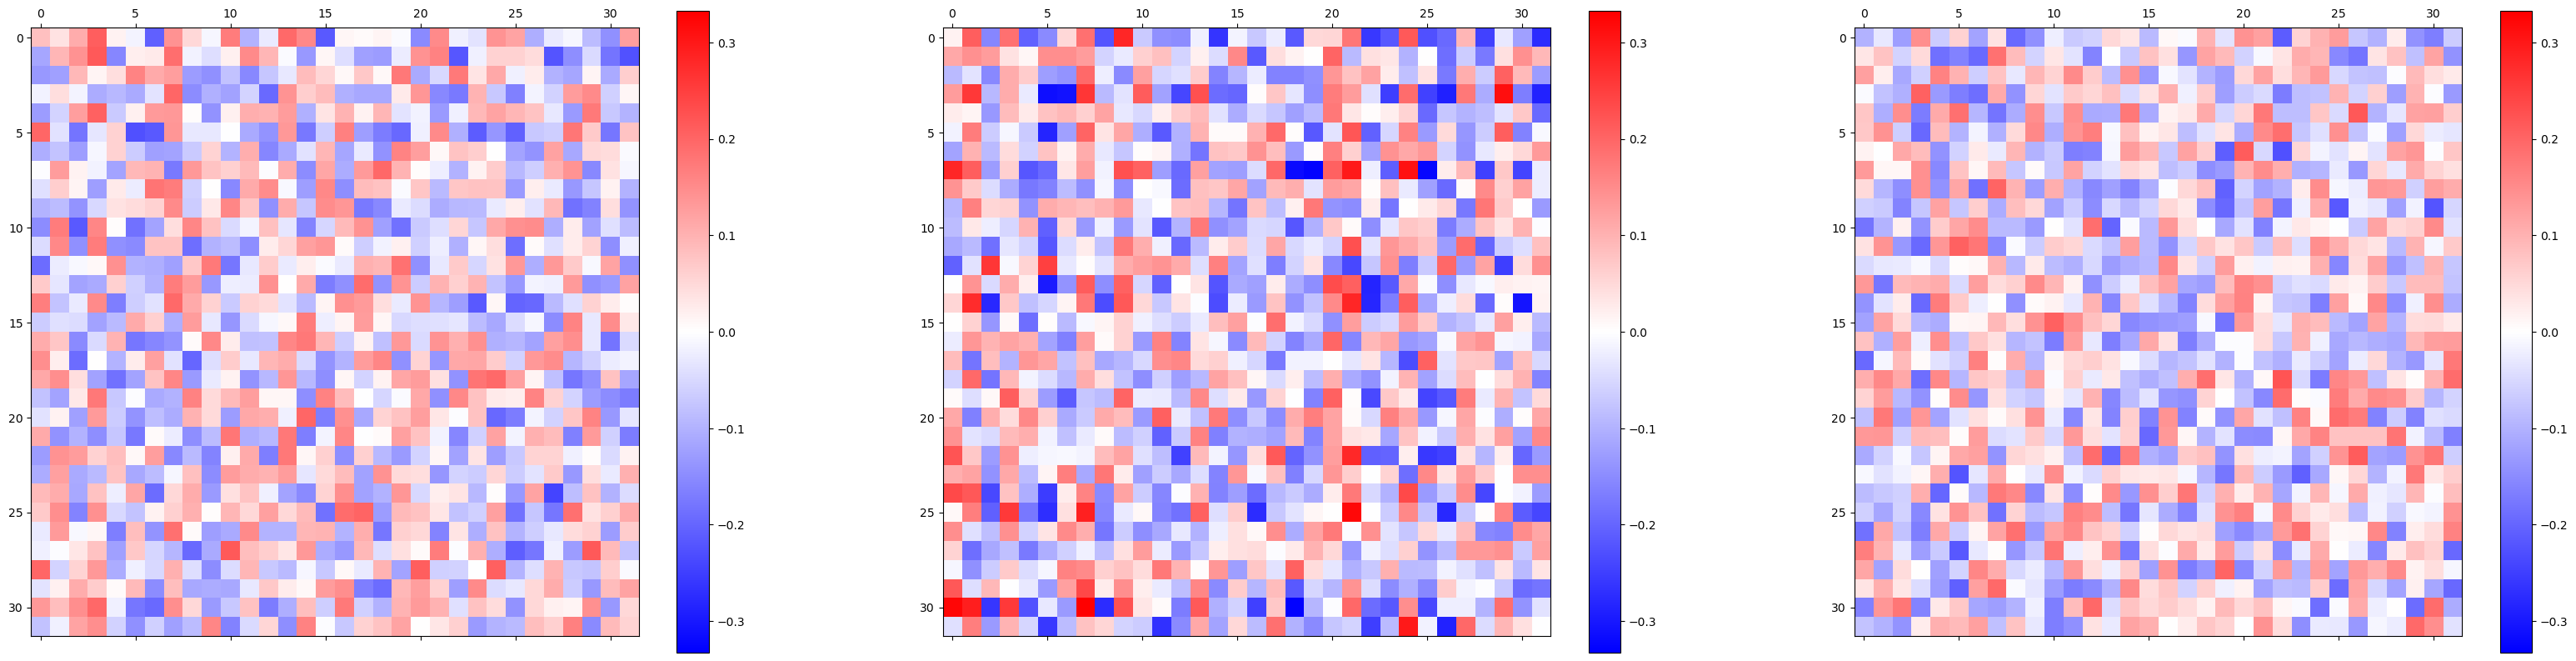

In [63]:
scale = 10
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

m = np.abs(w_hh_untrained).max()
for k in range(3):
    cbar = axs[k].matshow(w_hh_untrained[k * 32:(k+1) * 32], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

In [64]:
network_trained = GRU_RNN(
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    device=DEVICE,
    var_noise=VAR_NOISE,
)

load_path = '../../results/line_attr_supervised/test_2024-11-28_15_48_56_780557_var_noise_0.0001_activity_weight_1e-07/rnn_weights/009999.h5'
network_trained.load_state_dict(torch.load(load_path, weights_only=True))

<All keys matched successfully>

In [65]:
w_ih_trained = network_trained.rnn.weight_ih.detach().cpu().numpy()

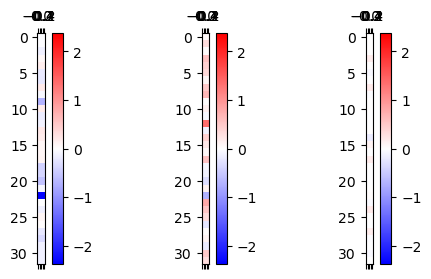

In [68]:
scale = 3
fig, axs = plt.subplots(1, 3, figsize=(2 * scale, 1 * scale))

m = np.abs(w_ih_trained).max()
for k in range(3):
    cbar = axs[k].matshow(w_ih_trained[k * 32:(k+1) * 32], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

In [69]:
w_hh_trained = network_trained.rnn.weight_hh.detach().cpu().numpy()
b_hh_trained = network_trained.rnn.bias_hh.detach().cpu().numpy()
w_ih_trained = network_trained.rnn.weight_ih.detach().cpu().numpy()
b_ih_trained = network_trained.rnn.bias_ih.detach().cpu().numpy()

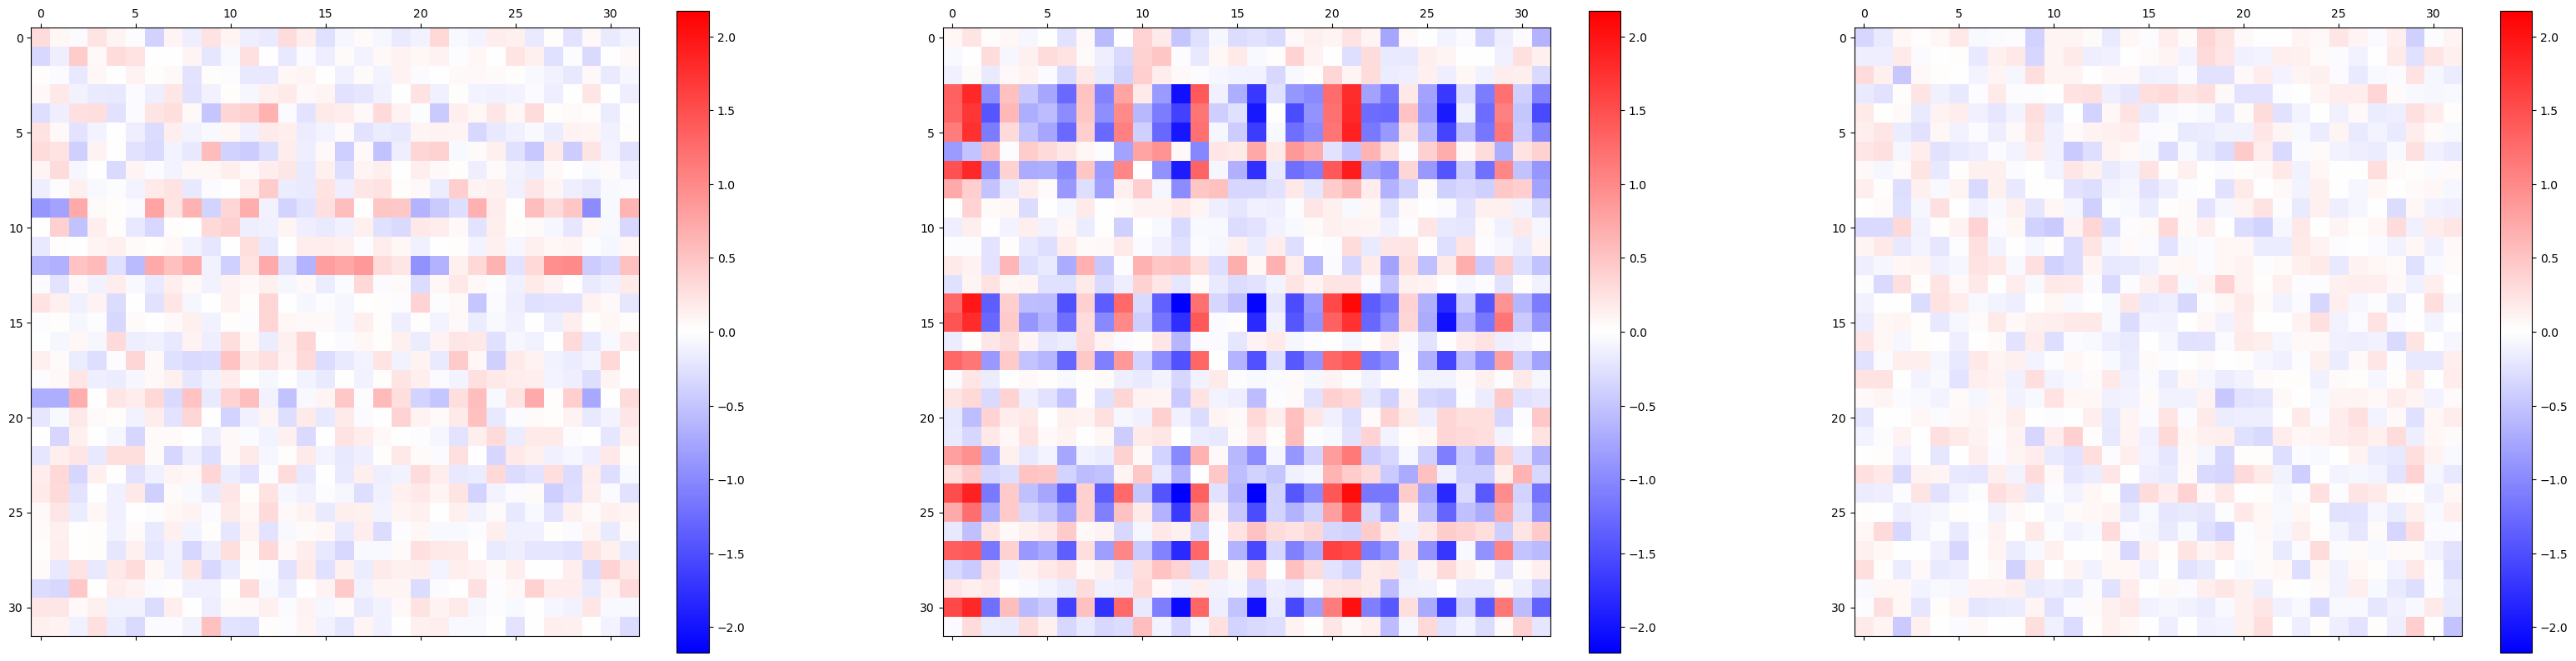

In [70]:
scale = 10
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

m = np.abs(w_hh_trained).max()
for k in range(3):
    cbar = axs[k].matshow(w_hh_trained[k * 32:(k+1) * 32], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

In [71]:
w_hh_trained_r = w_hh_trained[0 * 32:1 * 32, :]
w_hh_trained_z = w_hh_trained[1 * 32:2 * 32, :]
w_hh_trained_n = w_hh_trained[2 * 32:3 * 32, :]

w_hh_untrained_r = w_hh_untrained[0 * 32:1 * 32, :]
w_hh_untrained_z = w_hh_untrained[1 * 32:2 * 32, :]
w_hh_untrained_n = w_hh_untrained[2 * 32:3 * 32, :]

b_hh_trained_r = b_hh_trained[0 * 32:1 * 32]
b_hh_trained_z = b_hh_trained[1 * 32:2 * 32]
b_hh_trained_n = b_hh_trained[2 * 32:3 * 32]

b_hh_untrained_r = b_hh_untrained[0 * 32:1 * 32]
b_hh_untrained_z = b_hh_untrained[1 * 32:2 * 32]
b_hh_untrained_n = b_hh_untrained[2 * 32:3 * 32]

w_ih_trained_r = w_ih_trained[0 * 32:1 * 32, :]
w_ih_trained_z = w_ih_trained[1 * 32:2 * 32, :]
w_ih_trained_n = w_ih_trained[2 * 32:3 * 32, :]

w_ih_untrained_r = w_ih_untrained[0 * 32:1 * 32, :]
w_ih_untrained_z = w_ih_untrained[1 * 32:2 * 32, :]
w_ih_untrained_n = w_ih_untrained[2 * 32:3 * 32, :]

b_ih_trained_r = b_ih_trained[0 * 32:1 * 32]
b_ih_trained_z = b_ih_trained[1 * 32:2 * 32]
b_ih_trained_n = b_ih_trained[2 * 32:3 * 32]

b_ih_untrained_r = b_ih_untrained[0 * 32:1 * 32]
b_ih_untrained_z = b_ih_untrained[1 * 32:2 * 32]
b_ih_untrained_n = b_ih_untrained[2 * 32:3 * 32]

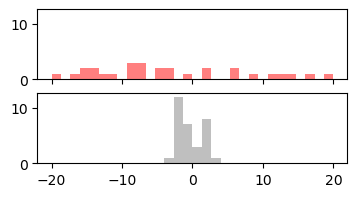

In [72]:
scale = 1
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 2 * scale), sharex=True, sharey=True)

m = np.abs(w_hh_trained).max()

axs[0].hist(w_hh_trained_z.sum(axis=0), color='red', alpha=0.5, bins=30, range=(-20, 20))
axs[1].hist(w_hh_untrained_z.sum(axis=0), color='grey', zorder=-1, alpha=0.5, bins=30, range=(-20, 20))

None

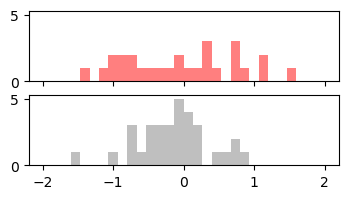

In [73]:
scale = 1
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 2 * scale), sharex=True, sharey=True)

m = np.abs(w_hh_trained).max()

w_hh_trained_r = w_hh_trained[0 * 32:1 * 32, :]
w_hh_trained_z = w_hh_trained[1 * 32:2 * 32, :]
w_hh_trained_n = w_hh_trained[2 * 32:3 * 32, :]

w_hh_untrained_r = w_hh_untrained[0 * 32:1 * 32, :]
w_hh_untrained_z = w_hh_untrained[1 * 32:2 * 32, :]
w_hh_untrained_n = w_hh_untrained[2 * 32:3 * 32, :]

axs[0].hist(w_hh_trained_r.sum(axis=1), color='red', alpha=0.5, bins=30, range=(-2, 2))
axs[1].hist(w_hh_untrained_r.sum(axis=1), color='grey', zorder=-1, alpha=0.5, bins=30, range=(-2, 2))

None

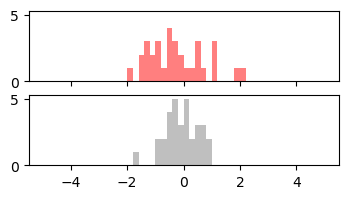

In [74]:
scale = 1
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 2 * scale), sharex=True, sharey=True)

m = np.abs(w_hh_trained).max()

w_hh_trained_r = w_hh_trained[0 * 32:1 * 32, :]
w_hh_trained_z = w_hh_trained[1 * 32:2 * 32, :]
w_hh_trained_n = w_hh_trained[2 * 32:3 * 32, :]

w_hh_untrained_r = w_hh_untrained[0 * 32:1 * 32, :]
w_hh_untrained_z = w_hh_untrained[1 * 32:2 * 32, :]
w_hh_untrained_n = w_hh_untrained[2 * 32:3 * 32, :]

axs[0].hist(w_hh_trained_n.sum(axis=1), color='red', alpha=0.5, bins=50, range=(-5, 5))
axs[1].hist(w_hh_untrained_n.sum(axis=1), color='grey', zorder=-1, alpha=0.5, bins=50, range=(-5, 5))

None

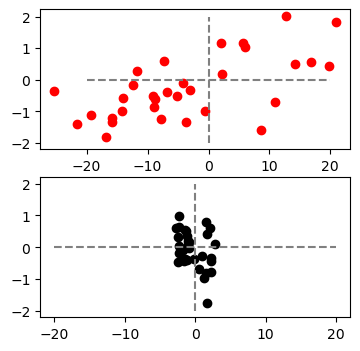

In [75]:
scale = 1
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 4 * scale), sharex=False, sharey=False)

m = np.abs(w_hh_trained).max()

w_hh_trained_r = w_hh_trained[0 * 32:1 * 32, :]
w_hh_trained_z = w_hh_trained[1 * 32:2 * 32, :]
w_hh_trained_n = w_hh_trained[2 * 32:3 * 32, :]

w_hh_untrained_r = w_hh_untrained[0 * 32:1 * 32, :]
w_hh_untrained_z = w_hh_untrained[1 * 32:2 * 32, :]
w_hh_untrained_n = w_hh_untrained[2 * 32:3 * 32, :]

# if recurrent weights to cell are primarily positive, w_hz out is likely also positive?

axs[0].scatter(w_hh_trained_z.sum(axis=0), w_hh_trained_n.sum(axis=1), c='red')
axs[1].scatter(w_hh_untrained_z.sum(axis=0), w_hh_untrained_n.sum(axis=1), c='black')

for i in range(2):
    axs[i].plot([-20, 20], [0, 0], '--', c='grey')
    axs[i].plot([0, 0], [-2, 2], '--', c='grey')

None

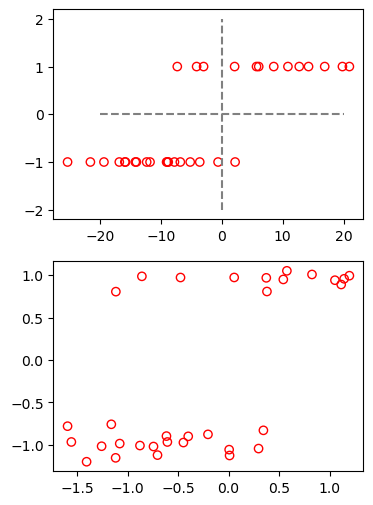

In [76]:
scale = 1
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 6 * scale), sharex=False, sharey=False)

m = np.abs(w_hh_trained).max()

w_hh_trained_r = w_hh_trained[0 * 32:1 * 32, :]
w_hh_trained_z = w_hh_trained[1 * 32:2 * 32, :]
w_hh_trained_n = w_hh_trained[2 * 32:3 * 32, :]

w_hh_untrained_r = w_hh_untrained[0 * 32:1 * 32, :]
w_hh_untrained_z = w_hh_untrained[1 * 32:2 * 32, :]
w_hh_untrained_n = w_hh_untrained[2 * 32:3 * 32, :]

# if recurrent weights to cell are primarily positive, w_hz out is likely also positive?

axs[0].scatter(w_hh_trained_z.sum(axis=0), valence, edgecolor='red', facecolor='none')
axs[1].scatter(w_hh_trained_n.sum(axis=0), valence + np.random.normal(scale=0.1, size=len(valence)), edgecolor='red', facecolor='none')

for i in range(1):
    axs[i].plot([-20, 20], [0, 0], '--', c='grey')
    axs[i].plot([0, 0], [-2, 2], '--', c='grey')

None

(32, 32)


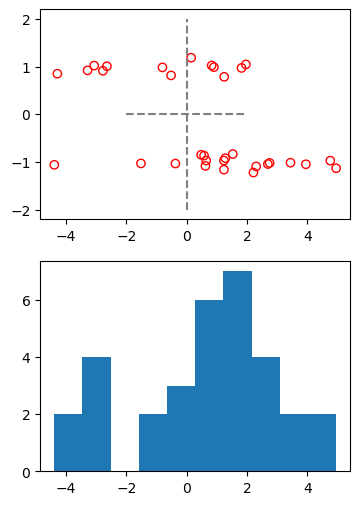

In [77]:
scale = 1
fig, axs = plt.subplots(2, 1, figsize=(4 * scale, 6 * scale), sharex=False, sharey=False)

m = np.abs(w_hh_trained).max()

# if recurrent weights to cell are primarily positive, w_hz out is likely also positive?

print(w_hh_trained_n.shape)

axs[1].hist((w_hh_trained_n * valence.reshape(1, 32)).sum(axis=1))

axs[0].scatter((w_hh_trained_n * valence.reshape(1, 32)).sum(axis=1), valence + np.random.normal(scale=0.1, size=len(valence)), edgecolor='red', facecolor='none')

for i in range(1):
    axs[i].plot([-2, 2], [0, 0], '--', c='grey')
    axs[i].plot([0, 0], [-2, 2], '--', c='grey')

Text(0.5, 1.0, 'Alignment between input weights and state')

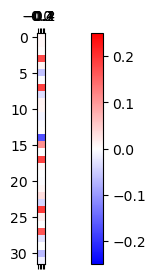

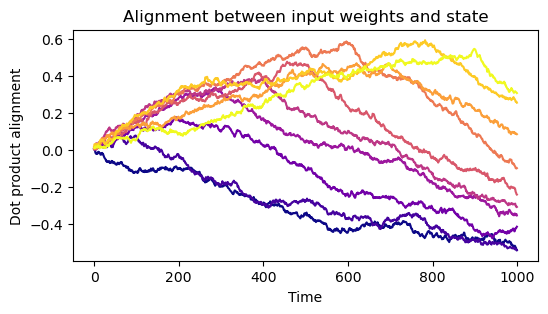

In [152]:
scale = 3
m = 0.25
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
cbar = axs.matshow(w_ih_trained_n.reshape(32, 1), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 10))

scale = 3
m = 0.5
fig, axs = plt.subplots(1, 1, figsize=(2 * scale, 1 * scale))
for l in range(0, 100, 10):
    cbar = axs.plot(np.arange(1000), np.dot(data[l, :, :].T, w_ih_trained_n), c=colors[int(l/10)])
axs.set_ylabel('Dot product alignment')
axs.set_xlabel('Time')
axs.set_title('Alignment between input weights and state')


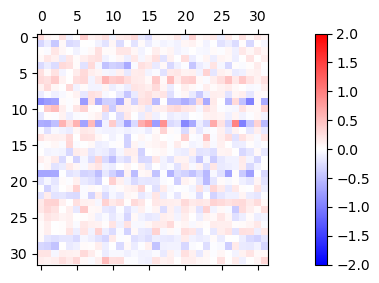

In [114]:
scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))

# w_hh_trained_z_valence = valence * w_hh_trained_z
# m = np.abs(w_hh_trained_z_valence).max()
m = 2
cbar = axs.matshow(w_hh_trained_r * valence.reshape(1, 32), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

(500, 32, 1000)


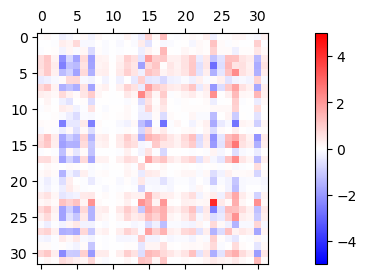

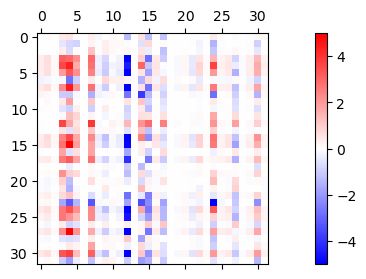

In [183]:
print(data.shape)

scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
m = 5
cbar = axs.matshow(w_hh_trained_z * data[0, :, -10:].sum(axis=1).reshape(1, 32), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
cbar = axs.matshow(w_hh_trained_z * data[99, :, -10:].sum(axis=1).reshape(1, 32), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

[ 1.7834264 +0.j         -1.312792  +0.j         -0.8034195 +0.49541268j
 -0.8034195 -0.49541268j -0.3666591 +0.6510901j  -0.3666591 -0.6510901j
 -0.20698339+0.6234149j  -0.20698339-0.6234149j  -0.72313935+0.j
 -0.66239136+0.j          0.31445736+0.2396662j   0.31445736-0.2396662j
  0.25481498+0.28950727j  0.25481498-0.28950727j -0.09864762+0.42735347j
 -0.09864762-0.42735347j -0.32315493+0.36717957j -0.32315493-0.36717957j
 -0.4534866 +0.07838388j -0.4534866 -0.07838388j -0.08804551+0.33118254j
 -0.08804551-0.33118254j  0.22883774+0.j          0.05338923+0.22514033j
  0.05338923-0.22514033j  0.11169687+0.06768916j  0.11169687-0.06768916j
 -0.25302306+0.1945241j  -0.25302306-0.1945241j  -0.18204056+0.j
 -0.07201344+0.13095963j -0.07201344-0.13095963j]


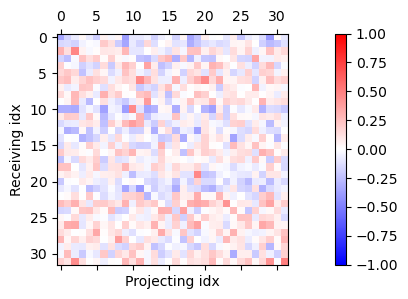

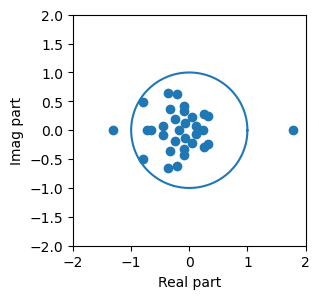

In [175]:
scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))

# w_hh_trained_z_valence = valence * w_hh_trained_z
# m = np.abs(w_hh_trained_z_valence).max()
m = 2
cbar = axs.matshow(w_hh_trained_n * valence.reshape(1, 32), vmin=-1, vmax=1, cmap='bwr')
plt.colorbar(cbar)
axs.set_ylabel('Receiving idx')
axs.set_xlabel('Projecting idx')

vals, vecs = np.linalg.eig(w_hh_trained_n)

scale = 3
fig, axs = plt.subplots(1, 1, figsize=(1 * scale, 1 * scale))

# for x in vals:
#     print(vals)

eigenvals = np.linalg.eig(w_hh_trained_n).eigenvalues
axs.scatter(np.real(eigenvals), np.imag(eigenvals))
l = np.linspace(0, 2 * np.pi, 100)
axs.plot(np.cos(l), np.sin(l))
axs.set_xlim(-2, 2)
axs.set_ylim(-2, 2)
axs.set_ylabel('Imag part')
axs.set_xlabel('Real part')

print(eigenvals)

[-0.00372807 -0.01687774  0.00462719  0.37305066 -0.29170328 -0.20614015
  0.00382306  0.25422344  0.00742466 -0.05984963  0.02058438  0.04709782
  0.16207777 -0.01559418 -0.38996875  0.25449574  0.00770699  0.23523565
  0.0018418   0.03748366 -0.02893027 -0.02742598 -0.05211006 -0.00990571
  0.42701444 -0.01794703  0.0021976   0.28529575  0.00775051 -0.01498204
 -0.30510265 -0.00296205]
[0.8676568]


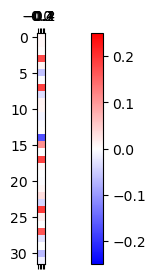

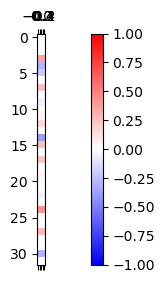

In [174]:
scale = 3
m = 0.25
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
w_ih_trained_n_ = w_ih_trained_n.reshape(32, 1)
cbar = axs.matshow(w_ih_trained_n_, vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

eigenvectors = np.linalg.eig(w_hh_trained_n).eigenvectors
print(np.real(eigenvectors[:, 0]))
scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
m = 1
cbar = axs.matshow(np.real(eigenvectors[:, 0]).reshape(32, 1), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

print(np.dot(np.real(eigenvectors[:, 0]), w_ih_trained_n_ / np.linalg.norm(w_ih_trained_n_)))

[-0.06789366  0.04971495  0.00215875 -0.2669895  -0.24747783 -0.28091076
  0.13547133 -0.277796   -0.07263713 -0.03536946 -0.02968417 -0.01407388
  0.07270604 -0.03421682 -0.3187922  -0.2622201  -0.00794948 -0.26320866
  0.00769146 -0.07329637  0.06994688  0.04570818 -0.15602498 -0.03990423
 -0.30310827 -0.20983173  0.10352629 -0.282883    0.06221238 -0.04954983
 -0.2934126  -0.00529221]
[-0.42839724]


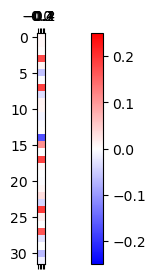

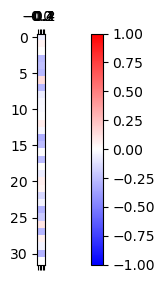

In [176]:
scale = 3
m = 0.25
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
w_ih_trained_n_ = w_ih_trained_n.reshape(32, 1)
cbar = axs.matshow(w_ih_trained_n_, vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

eigenvectors = np.linalg.eig(w_hh_trained_z).eigenvectors
print(np.real(eigenvectors[:, 0]))
scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
m = 1
cbar = axs.matshow(np.real(eigenvectors[:, 0]).reshape(32, 1), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

print(np.dot(np.real(eigenvectors[:, 0]), w_ih_trained_n_ / np.linalg.norm(w_ih_trained_n_)))

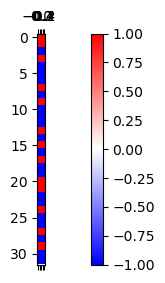

In [80]:
scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))

# w_hh_trained_z_valence = valence * w_hh_trained_z
# m = np.abs(w_hh_trained_z_valence).max()
m = 1
cbar = axs.matshow(valence.reshape(32, 1), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

In [87]:
def load_hidden_activity(data_path, averaging_size=1):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        print(file_name)
        data_for_file = np.load(file_name)
        print(data_for_file.shape)
        data.append(data_for_file)
    data = np.concatenate(data, axis=0)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [88]:
data = load_hidden_activity(
    '../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/hidden_states/*.npy'
)

../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/hidden_states\000000.npy
(100, 32, 1000)
../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/hidden_states\000001.npy
(100, 32, 1000)
../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/hidden_states\000002.npy
(100, 32, 1000)
../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/hidden_states\000003.npy
(100, 32, 1000)
../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/hidden_states\000004.npy
(100, 32, 1000)


In [28]:
print(data.shape)

(500, 32, 1000)


0
10
20
30
40
50
60
70
80
90


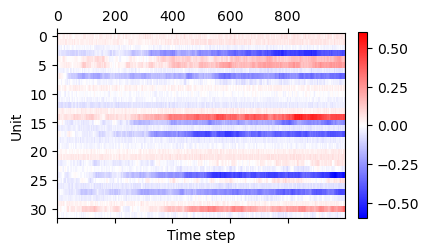

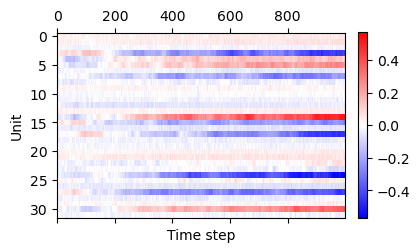

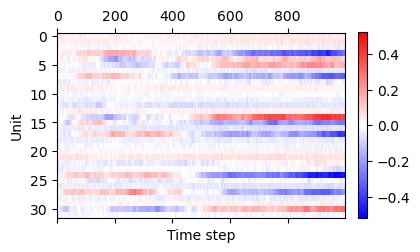

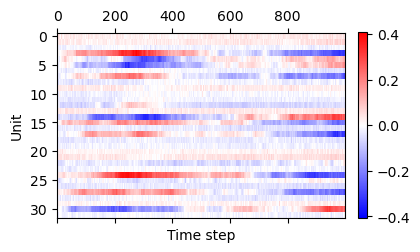

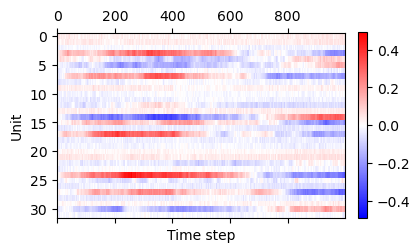

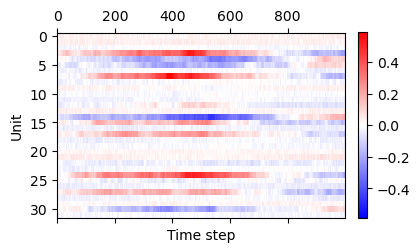

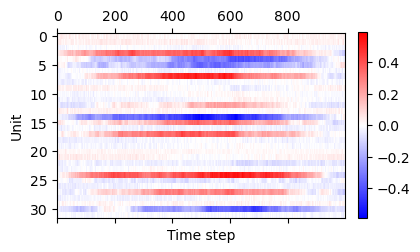

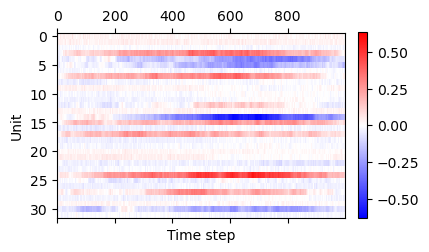

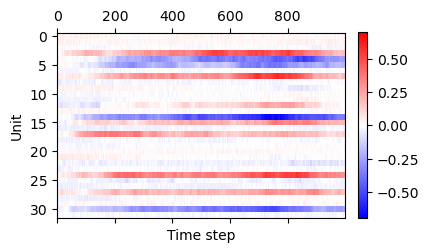

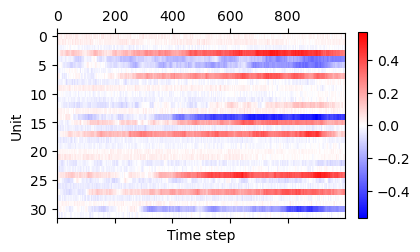

In [57]:
for k in range(0, 100, 10):
    print(k)
    hidden_activity = data[k, ...]
    
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))
    axs.set_ylabel('Unit')
    axs.set_xlabel('Time step')
    
    m = np.abs(hidden_activity).max()
    cbar = axs.matshow(hidden_activity, vmin=-m, vmax=m, cmap='bwr', aspect=20)
    plt.colorbar(cbar, fraction=0.03, pad=0.04)

(500, 32, 1000)


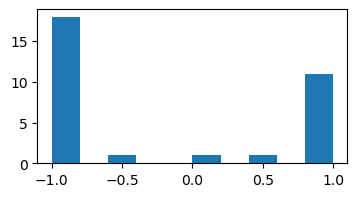

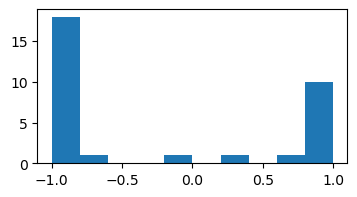

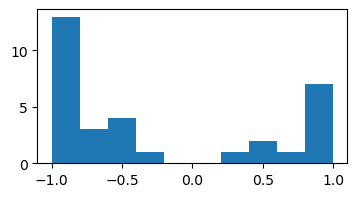

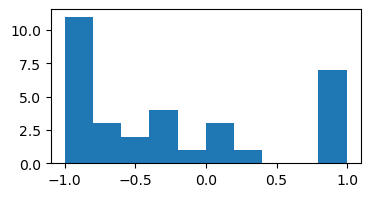

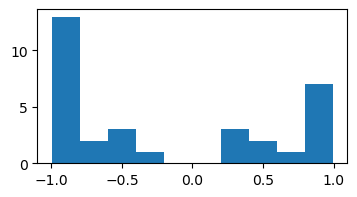

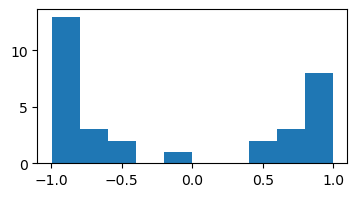

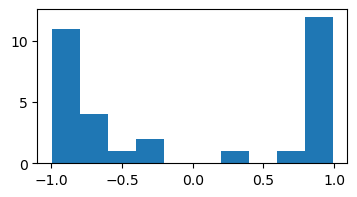

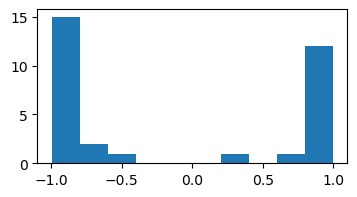

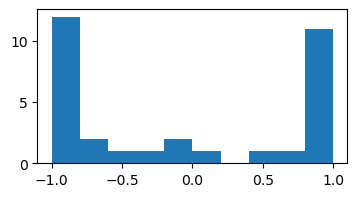

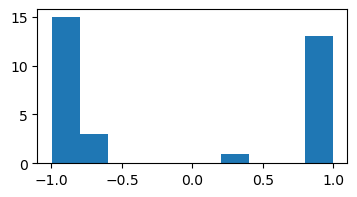

In [83]:
for k in range(0, 100, 10):
    hidden_activity = data[k, ...]
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 2 * scale))
    axs.hist(data[k, ...].sum(axis=1) / np.abs(data[k, ...]).sum(axis=1))

print(data.shape)
valence = (data.sum(axis=2) / np.abs(data).sum(axis=2)).mean(axis=0) > 0
valence = np.where(valence, 1, -1)

In [91]:
data_ = np.transpose(data, [1, 0, 2])
flattened_data = data_.reshape(data_.shape[0], data_.shape[1] * data_.shape[2])
print(data_.shape)
print(flattened_data.shape)
pca = PCA()
pc_activities = pca.fit_transform(flattened_data.T)
explained_variance_ratios = pca.explained_variance_ratio_

(32, 500, 1000)
(32, 500000)


Text(0.5, 0, 'PC')

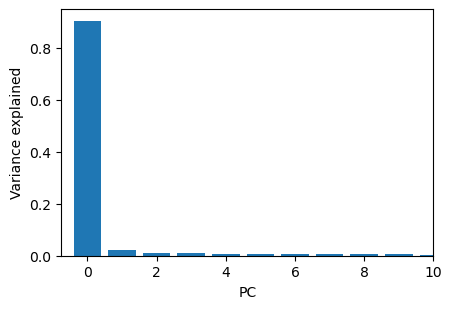

In [93]:
scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.bar(np.arange(explained_variance_ratios.shape[0]), explained_variance_ratios)
axs.set_xlim(-0.75, 10)
axs.set_ylabel('Variance explained')
axs.set_xlabel('PC')

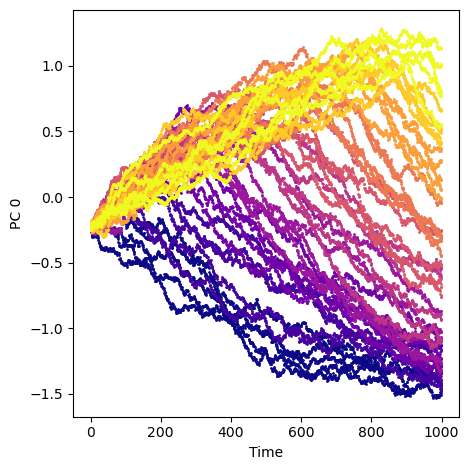

In [153]:
scale = 1.2
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 10))


for run_idx in range(0, 100, 2):
    for k in np.arange(0, 2, 2):
        cbar = axs.scatter(
            np.arange(data.shape[2]),
            pc_activities[data.shape[2] * run_idx:data.shape[2] * (run_idx + 1), k],
            s=1,
            color=colors[int(run_idx/10)],
            # vmax=2,
        )
axs.set_xlabel(f'Time')
axs.set_ylabel(f'PC 0')
    # fig.colorbar(cbar)
fig.tight_layout()

In [31]:
def load_numpy(data_path, averaging_size=1):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        print(file_name)
        data_for_file = np.load(file_name)
        print(data_for_file.shape)
        data.append(data_for_file)
    data = np.concatenate(data, axis=0)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [32]:
output_data = load_hidden_activity(
    '../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/outputs/*.npy'
)

../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/outputs\000000.npy
(2, 100)
../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/outputs\000001.npy
(2, 100)
../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/outputs\000002.npy
(2, 100)
../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/outputs\000003.npy
(2, 100)
../../results/line_attr_supervised/prog_input_line_attr_test_2024-12-03_09_04_13_012533_var_noise_0.0001_activity_weight_1e-07/outputs\000004.npy
(2, 100)


In [33]:
print(output_data.shape)

(10, 100)


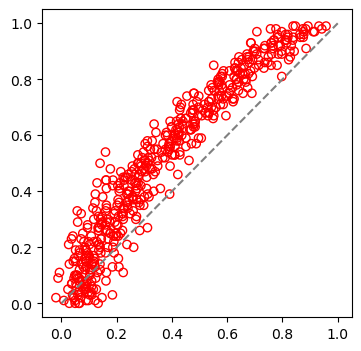

In [53]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

for k in range(0, output_data.shape[0], 2):
    y = output_data[k, ...]
    y_targ = output_data[k+1, ...]

    cbar = axs.scatter(y, y_targ, edgecolor='red', facecolor='none')
axs.plot([0, 1], [0, 1], '--', c='gray')